- Description of Notebook: This analysis compares the number of orthologs between banana and human using OMA,OrthoInspector, and best-bidirectional hit
- Last updated: 19 Apr 2020
- By: Natasha Glover

# Setup

In [4]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
plt.style.use('ggplot')

#seaborn options
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=1.5)
sns.set_style('whitegrid')

# Human-Banana orthologs using OrthoInspector

In [2]:
human_ncbi_taxid = str(9606)
banana_ncbi_taxid = str(214687)

In [3]:
#get all the banana genes with an ortholog in human
response = requests.get("http://lbgi.fr/orthoinspectorv3/api/Eukaryota/species/"+ banana_ncbi_taxid +\
                        "/orthologs/"+ human_ncbi_taxid)

#count the number of banana genes with a human ortholog
banana_genes_with_orthologs = response.json()

print("There are {} banana genes with a human ortholog.".format(len(banana_genes_with_orthologs.keys())))

#count the number of banana genes
banana_genome = requests.get("http://lbgi.fr/orthoinspectorv3/api/Eukaryota/species/214687/proteins").json()

print("There are {} total number of genes in banana.".format(len(banana_genome)))

#percentage of banana genes with a human ortholog
percentage = len(banana_genes_with_orthologs.keys())/len(banana_genome)*100
print("Using OrthoInspector, {:.0f}% of the banana genome's proteins have an ortholog in human.".format(percentage))


There are 7668 banana genes with a human ortholog.
There are 36440 total number of genes in banana.
Using OrthoInspector, 21% of the banana genome's proteins have an ortholog in human.


Same thing with human.

In [4]:
#get all the human genes with an ortholog in banana
response = requests.get("http://lbgi.fr/orthoinspectorv3/api/Eukaryota/species/"+ human_ncbi_taxid +\
                        "/orthologs/"+ banana_ncbi_taxid)

#count the number of human  genes with a banana ortholog
human_genes_with_orthologs = response.json()

print("There are {} human genes with a banana ortholog.".format(len(human_genes_with_orthologs.keys())))

#count the number of human genes
human_genome = requests.get("http://lbgi.fr/orthoinspectorv3/api/Eukaryota/species/"+ human_ncbi_taxid +"/proteins").json()

print("There are {} total number of genes in human.".format(len(human_genome)))

#percentage of human genes with a banana ortholog
percentage = len(human_genes_with_orthologs.keys())/len(human_genome)*100
print("Using OrthoInspector, {:.0f}% of the human genome's proteins have an ortholog in banana.".format(percentage))


There are 5058 human genes with a banana ortholog.
There are 21006 total number of genes in human.
Using OrthoInspector, 24% of the human genome's proteins have an ortholog in banana.


# Human-Banana orthologs using OMA

Download from: https://omabrowser.org/oma/genomePW/ by selecting HUMAN as species 1 and MUSAM (banana) as species 2 and saving in a file "human_musam_orthologs.txt". Also did the reverse by selecting banana as species 1 and human as species 2.

In [80]:
%%bash
#count number of orthologs

cd ~/Downloads/

echo "Number of human genes with banana orthologs:"
sed '/^$/d' human_musam_orthologs.txt | cut -f 1 | sort | uniq | less | wc -l

echo "Number of banana genes with human orthologs:"
sed '/^$/d' musam_human_orthologs.txt | cut -f 1 | sort | uniq | less | wc -l

Number of human genes with banana orthologs:
    3483
Number of banana genes with human orthologs:
    5200


In [5]:
#Use the OMA API to get all the genes in the genome
api_url = "https://omabrowser.org/api"

def get_all_proteins(genome):
    '''Gets all proteins using OMA REST API'''
    responses = []
    response = requests.get(api_url + '/genome/{}/proteins/'.format(genome))
    total_nb_pages = round(int(response.headers['X-Total-Count'])/100)
    for page in range(1, total_nb_pages + 1):
        tmp_response = requests.get(api_url + '/genome/{}/proteins/'.format(genome)+"?page="+str(page))
        responses.append(tmp_response.json())

    proteins = []
    for response in responses:
        for entry in response:
            if entry['is_main_isoform'] == True:
                proteins.append(entry)
    return proteins

In [17]:
genome1 = "HUMAN"
genome2 = "MUSAM"
responses = []

#human_banana_ortholog_pairs = response.json()
total_nb_pages = round(int(response.headers['X-Total-Count'])/100)
for page in range(1, total_nb_pages + 1):
    tmp_response = requests.get(api_url + '/pairs/{}/{}/'.format(genome1, genome2)+"?page="+str(page))
    responses.append(tmp_response.json()) 

In [30]:
genes = []

for response in responses:
    for entry in response:
        genes.append(entry["entry_1"]["canonicalid"])
            
my_string = ','.join(set(genes))
my_string

'CYLC2_HUMAN,CATIN_HUMAN,PTBP3_HUMAN,TMA7_HUMAN,UBP11_HUMAN,APT_HUMAN,KTAP2_HUMAN,EDEM1_HUMAN,GGA1_HUMAN,LIPM_HUMAN,E7EUC7,H15_HUMAN,S35A5_HUMAN,TI17A_HUMAN,FXDC2_HUMAN,ENSG00000249948.6,HHATL_HUMAN,IPO11_HUMAN,EIF3A_HUMAN,S13A1_HUMAN,DOLK_HUMAN,UFD1_HUMAN,UBR2_HUMAN,PI4KA_HUMAN,NUDT7_HUMAN,B0QY34,RS4X_HUMAN,A0A087X295,ELN_HUMAN,SMC6_HUMAN,TTPAL_HUMAN,CNOT7_HUMAN,CEPT1_HUMAN,DIEXF_HUMAN,ROA2_HUMAN,ILKAP_HUMAN,CZIB_HUMAN,PRAF1_HUMAN,PSME4_HUMAN,RPA1_HUMAN,SPB10_HUMAN,B7WP89,APC10_HUMAN,MUC22_HUMAN,ERO1A_HUMAN,CP4V2_HUMAN,ZN771_HUMAN,CNOT6_HUMAN,SBP1_HUMAN,ABCC8_HUMAN,SLD5_HUMAN,NT5D2_HUMAN,DGAT1_HUMAN,GBP7_HUMAN,TBL3_HUMAN,SRS12_HUMAN,DPH2_HUMAN,TCPH_HUMAN,PK1IP_HUMAN,INP5K_HUMAN,DCNL1_HUMAN,PSB6_HUMAN,PAL4H_HUMAN,RBM39_HUMAN,KC1A_HUMAN,B4DLP0,TRM13_HUMAN,H0Y623,SETLP_HUMAN,NGDN_HUMAN,TRM61_HUMAN,ST1C3_HUMAN,PEX19_HUMAN,PTGR1_HUMAN,ABCG8_HUMAN,ELP6_HUMAN,TPPC5_HUMAN,RM15_HUMAN,CP26A_HUMAN,CDC73_HUMAN,S35A4_HUMAN,GBB3_HUMAN,HOOK1_HUMAN,DHX33_HUMAN,RS4Y1_HUMAN,H2B1J_HUMAN,ARLY_HUMAN,RBM22

In [47]:
go_df = pd.read_csv("~/Downloads/analysis.txt", sep="\t")
go_df['go_term'] = go_df['GO biological process complete'].apply(lambda x: x.split("(")[1])
go_df['go_term'] = go_df['go_term'].apply(lambda x: x.split(")")[0])
go_df
print(go_df[['go_term','Client Text Box Input (P-value)']].to_string(index=False, justify="left"))

go_term                         Client Text Box Input (P-value)
                    GO:0006067   4.760000e-03                  
                    GO:0002183   2.200000e-04                  
                    GO:0019373   1.690000e-02                  
                    GO:0006490   3.780000e-02                  
                    GO:0002181   2.160000e-13                  
 SSU-rRNA, 5.8S rRNA, LSU-rRNA   5.340000e-05                  
                    GO:0006413   2.870000e-27                  
                    GO:0006614   5.080000e-17                  
                    GO:0042738   1.250000e-02                  
                    GO:0015695   3.910000e-03                  
                    GO:0006862   2.750000e-02                  
                    GO:0000291   3.850000e-04                  
                    GO:0006613   1.190000e-16                  
                    GO:0045047   1.220000e-17                  
                    GO:0043928   1.82000

In [42]:
go_df

,GO biological process complete,Homo sapiens - REFLIST (20851),Client Text Box Input (3161),Client Text Box Input (expected),Client Text Box Input (over/under),Client Text Box Input (fold Enrichment),Client Text Box Input (P-value),go_term
0,ethanol metabolic process (GO:0006067),21,18,3.18,+,5.65,4.760000e-03,GO:0006067
1,cytoplasmic translational initiation (GO:0002183),28,23,4.24,+,5.42,2.200000e-04,GO:0002183
2,epoxygenase P450 pathway (GO:0019373),21,17,3.18,+,5.34,1.690000e-02,GO:0019373
3,oligosaccharide-lipid intermediate biosyntheti...,20,16,3.03,+,5.28,3.780000e-02,GO:0006490
4,cytoplasmic translation (GO:0002181),73,56,11.07,+,5.06,2.160000e-13,GO:0002181
...,...,...,...,...,...,...,...,...
590,cardiac septum development (GO:0003279),111,1,16.83,-,0.06,3.550000e-02,GO:0003279
591,B cell receptor signaling pathway (GO:0050853),128,1,19.40,-,0.05,5.000000e-03,GO:0050853
592,detection of chemical stimulus involved in sen...,483,3,73.22,-,0.04,7.580000e-22,GO:0050907
593,sensory perception of smell (GO:0007608),468,2,70.95,-,0.03,3.480000e-22,GO:0007608


In [84]:
#count the number and percent of human genes with an ortholog in banana
human_genome = get_all_proteins("HUMAN")
print("There are {} total number of genes in human.".format(len(human_genome)))

percentage = 3483/len(human_genome)* 100
print("Using OMA, {:.0f}% of the human genome's proteins have an ortholog in banana.".format(percentage), "\n")

#count the number and percent of human genes with a pairwise ortholog in banana
banana_genome = get_all_proteins("MUSAM")
print("There are {} total number of genes in banana.".format(len(banana_genome)))

percentage = 5200/len(banana_genome)* 100
print("Using OMA, {:.0f}% of the banana genome's proteins have an ortholog in human.".format(percentage))

There are 20152 total number of genes in human.
Using OMA, 17% of the human genome's proteins have an ortholog in banana. 

There are 36400 total number of genes in banana.
Using OMA, 14% of the banana genome's proteins have an ortholog in human.


# Human-banana orthologs using Best Bidirectional Hit

- Downloaded latest version (v2) of the banana genome from Bananan Genome Hub: https://banana-genome-hub.southgreen.fr/sites/banana-genome-hub.southgreen.fr/files/data/fasta/version2/musa_acuminata_v2_prot.faa

- Downloaded human genome from NCBI: ftp://ftp.ncbi.nih.gov/genomes/Homo_sapiens/protein/protein.fa.gz

Update:
- Downloaded human genome from UniProt: https://www.uniprot.org/proteomes/UP000005640
- This reference proteome has 20874 genes, one representative protein per locus.

- Downloaded the mouse genome from UniProt: https://www.uniprot.org/proteomes/UP000012960
- 36474 genes (1 protein sequence per gene)

Commands for running blast:
- module add Blast/ncbi-blast/2.6.0+
- makeblastdb -in UP_human.fa -dbtype prot
- makeblastdb -in UP_banana.fa -dbtype prot
- mkdir human_vs_banana; mkdir banana_vs_human; mkdir human_vs_banana/blast_fasta_files; mkdir human_vs_banana/blast_job_files; mkdir human_vs_banana/blast_output; mkdir banana_vs_human/blast_fasta_files; mkdir banana_vs_human/blast_job_files; mkdir banana_vs_human/blast_output;
- pyfasta split -n 100 banana.fa; mv banana.*.fa banana_vs_human/blast_fasta_files/
- pyfasta split -n 100 human.fa; mv human.*.fa human_vs_banana/blast_fasta_files/

- for i in {00..49}; do echo -e '#!/bin/bash\n#BSUB -L /bin/bash\n#BSUB -o blast-output.txt\n#BSUB -e blast-error.txt\n#BSUB -J "blast"\n#BSUB -q priority\n#BSUB -n 8\n#BSUB -R "span[hosts=1]"\nmodule add Blast/ncbi-blast/2.6.0+\nblastp -num_threads 8 -max_target_seqs 1 -db /scratch/beegfs/monthly/nglover/human.fa -query /scratch/beegfs/monthly/nglover/banana_vs_human/blast_fasta_files/banana.'$i'.fa -outfmt 6 -out /scratch/beegfs/monthly/nglover/banana_vs_human/blast_output/banana_vs_human_'$i'.blastp\n' > ../blast_job_files/blastp_$i.sh; done
- cd blast_job_files; for file in *sh; do bsub < "$file"; done

- for i in {00..49}; do echo -e '#!/bin/bash\n#BSUB -L /bin/bash\n#BSUB -o blast-output.txt\n#BSUB -e blast-error.txt\n#BSUB -J "blast"\n#BSUB -q priority\n#BSUB -n 8\n#BSUB -R "span[hosts=1]"\nmodule add Blast/ncbi-blast/2.6.0+\nblastp -num_threads 8 -max_target_seqs 1 -db /scratch/beegfs/monthly/nglover/banana.fa -query /scratch/beegfs/monthly/nglover/human_vs_banana/blast_fasta_files/human.'$i'.fa -outfmt 6 -out /scratch/beegfs/monthly/nglover/human_vs_banana/blast_output/human_vs_banana_'$i'.blastp\n' > ../blast_job_files/blastp_$i.sh; done

Command: for i in {00..49}; do echo -e '#!/bin/bash\n#BSUB -L /bin/bash\n#BSUB -o blast-output.txt\n#BSUB -e blast-error.txt\n#BSUB -J "blast"\n#BSUB -q priority\n#BSUB -n 8\n#BSUB -R "span[hosts=1]"\nmodule add Blast/ncbi-blast/2.6.0+\nblastp -num_threads 8 -max_target_seqs 1 -db /scratch/beegfs/monthly/nglover/banana.fa -query /scratch/beegfs/monthly/nglover/human_vs_banana/blast_fasta_files/human.'$i'.fa -outfmt 6 -out /scratch/beegfs/monthly/nglover/human_vs_banana/blast_output/human_vs_banana_'$i'.blastp\n' > ../blast_job_files/blastp_$i.sh; done


for i in {00..49}; do echo -e '#!/bin/bash\n#BSUB -L /bin/bash\n#BSUB -o blast-output.txt\n#BSUB -e blast-error.txt\n#BSUB -J "blast"\n#BSUB -q priority\n#BSUB -n 8\n#BSUB -R "span[hosts=1]"\nmodule add Blast/ncbi-blast/2.6.0+\nblastp -num_threads 8 -max_target_seqs 1 -db /scratch/beegfs/monthly/nglover/human.fa -query /scratch/beegfs/monthly/nglover/banana_vs_human/blast_fasta_files/banana.'$i'.fa -outfmt 6 -out /scratch/beegfs/monthly/nglover/banana_vs_human/blast_output/banana_vs_human_'$i'.blastp\n' > ../blast_job_files/blastp_$i.sh; done

In [130]:
header = ["qseqid","sseqid","pident","length","mismatch","gapopen","qstart","qend","sstart","send","evalue","bitscore"]
human_df = pd.read_csv("~/DataAnalysis/human_banana/human_vs_banana.blastp", sep="\t", header=None)
human_df.columns = header
human_df = human_df.drop_duplicates(subset="qseqid", keep="first")
human_df.rename({"qseqid":"human_gene", "sseqid":"banana_gene"}, axis=1, inplace=True)
print(len(human_df))
      
human_df[:10]


19896


,human_gene,banana_gene,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,sp|Q8WZ42|TITIN_HUMAN,tr|M0TF21|M0TF21_MUSAM,30.847,295,190,5,32161,32444,78,369,1.050000e-41,166.0
1,sp|Q13332|PTPRS_HUMAN,tr|M0SBA9|M0SBA9_MUSAM,38.367,245,138,9,1414,1647,83,325,2.670000e-39,150.0
3,sp|A3KMH1|VWA8_HUMAN,tr|M0RW31|M0RW31_MUSAM,23.051,295,181,11,365,644,175,438,3.160000e-05,48.9
4,sp|O75096|LRP4_HUMAN,tr|M0U1K2|M0U1K2_MUSAM,37.500,56,28,3,378,428,193,246,1.700000e-02,39.7
5,sp|Q92545|TM131_HUMAN,tr|M0SGI5|M0SGI5_MUSAM,25.316,316,196,11,835,1136,392,681,2.980000e-13,75.1
7,sp|Q14185|DOCK1_HUMAN,tr|M0RH51|M0RH51_MUSAM,23.043,460,263,19,1214,1608,617,1050,2.270000e-10,65.9
8,sp|Q9Y6D6|BIG1_HUMAN,tr|M0TRU5|M0TRU5_MUSAM,35.987,1256,671,23,377,1536,256,1474,0.000000e+00,763.0
10,sp|Q69YN4|VIR_HUMAN,tr|M0SG33|M0SG33_MUSAM,23.191,608,336,23,1149,1677,1115,1670,4.500000e-07,55.1
13,sp|O43166|SI1L1_HUMAN,tr|M0RRY8|M0RRY8_MUSAM,22.822,241,153,9,1587,1796,433,671,4.700000e+00,32.0
14,sp|O60292|SI1L3_HUMAN,tr|M0THB7|M0THB7_MUSAM,36.000,50,32,0,1725,1774,119,168,9.200000e-02,37.0


In [134]:
banana_df = pd.read_csv("~/DataAnalysis/human_banana/banana_vs_human.blastp", sep="\t", header=None)
banana_df.columns = header
banana_df = banana_df.drop_duplicates(subset="qseqid", keep="first")
banana_df.rename({"qseqid":"banana_gene", "sseqid":"human_gene"}, axis=1, inplace=True)
print(len(banana_df))
banana_df[:10]

35577


,banana_gene,human_gene,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,tr|M0TA06|M0TA06_MUSAM,sp|Q9BYJ1|LOXE3_HUMAN,31.193,327,187,7,318,639,250,543,3.570000e-31,135.0
1,tr|M0SN15|M0SN15_MUSAM,sp|P62191|PRS4_HUMAN,76.786,56,13,0,1,56,385,440,8.880000e-26,96.3
2,tr|M0TF66|M0TF66_MUSAM,sp|O94888|UBXN7_HUMAN,37.778,45,20,2,8,47,438,479,3.200000e+00,24.6
3,tr|M0SZN8|M0SZN8_MUSAM,sp|A8MX80|YM017_HUMAN,33.333,30,20,0,16,45,182,211,1.300000e+00,25.8
4,tr|M0TVT6|M0TVT6_MUSAM,sp|Q13509|TBB3_HUMAN,87.273,55,7,0,1,55,388,442,6.950000e-28,102.0
5,tr|M0SFF6|M0SFF6_MUSAM,sp|Q8IYW4|ENTD1_HUMAN,31.373,51,28,1,5,55,347,390,1.100000e+00,26.2
6,tr|M0TT87|M0TT87_MUSAM,sp|Q12929|EPS8_HUMAN,33.333,48,28,2,3,50,113,156,2.300000e-01,28.1
7,tr|M0U7H3|M0U7H3_MUSAM,sp|O14975|S27A2_HUMAN,31.818,44,28,1,3,46,175,216,1.400000e+00,25.8
8,tr|M0RF76|M0RF76_MUSAM,sp|O76054|S14L2_HUMAN,36.364,44,23,2,12,51,9,51,2.100000e+00,25.4
9,tr|M0UA02|M0UA02_MUSAM,sp|Q5JSZ5|PRC2B_HUMAN,54.545,22,10,0,4,25,912,933,9.400000e-01,26.6


In [137]:
bbh_df = pd.merge(left=human_df, right=banana_df, on=['human_gene', 'banana_gene'], how="inner")
bbh_df[:5]

,human_gene,banana_gene,pident_x,length_x,mismatch_x,gapopen_x,qstart_x,qend_x,sstart_x,send_x,...,pident_y,length_y,mismatch_y,gapopen_y,qstart_y,qend_y,sstart_y,send_y,evalue_y,bitscore_y
0,sp|Q69YN4|VIR_HUMAN,tr|M0SG33|M0SG33_MUSAM,23.191,608,336,23,1149,1677,1115,1670,...,84.000,25,4,0,1620,1644,1637,1661,2.040000e-05,49.7
1,sp|O43432|IF4G3_HUMAN,tr|M0S920|M0S920_MUSAM,30.473,676,373,20,756,1388,22,643,...,29.205,654,410,13,22,643,756,1388,1.320000e-71,252.0
2,sp|P54296|MYOM2_HUMAN,tr|M0SHD8|M0SHD8_MUSAM,40.278,72,36,4,419,490,337,401,...,40.278,72,36,4,337,401,419,490,2.000000e-02,37.0
3,sp|Q9NTI5|PDS5B_HUMAN,tr|M0SBP7|M0SBP7_MUSAM,25.112,1119,770,28,19,1105,9,1091,...,25.112,1119,770,28,9,1091,19,1105,1.630000e-83,302.0
4,sp|Q9ULK4|MED23_HUMAN,tr|M0SCL6|M0SCL6_MUSAM,22.256,665,415,30,522,1135,233,846,...,21.538,910,528,40,233,1080,522,1307,4.490000e-16,83.6


In [147]:
nb_bbhs = len(bbh_df)
nb_human_genes_uniprot = 20874
nb_banana_genes_uniprot = 36474
print("There are {} genes in the uniprot reference human proteome."\
      .format(nb_human_genes_uniprot))
print("There are {} genes in the uniprot reference banana proteome."\
      .format(nb_banana_genes_uniprot))
print("There are {} best bidirectional hits between human and banana."\
      .format(nb_bbhs))
print("This is {:.0f}% of the human genome, and {:.0f}% of the banana genome."\
      .format(nb_bbhs/nb_human_genes_uniprot*100, nb_bbhs/nb_banana_genes_uniprot*100))

There are 20874 genes in the uniprot reference human proteome.
There are 36474 genes in the uniprot reference banana proteome.
There are 4582 best bidirectional hits between human and banana.
This is 22% of the human genome, and 13% of the banana genome.


# Summary

<AxesSubplot:xlabel='method', ylabel='% of genome shared with the other'>

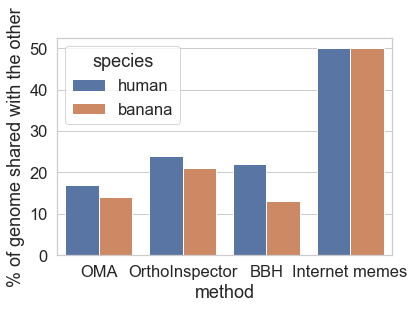

In [7]:
summary_df = pd.DataFrame(data={"method": ["OMA","OrthoInspector","BBH","Internet memes"], "human": [17,24,22,50], \
                                "banana":[14,21,13,50]})
df = pd.melt(summary_df, id_vars="method", value_vars=["human", "banana"])
df.rename({"variable":"species", "value": "% of genome shared with the other"}, axis=1, inplace=True)

sns.barplot(x="method", y="% of genome shared with the other", data=df, hue="species")

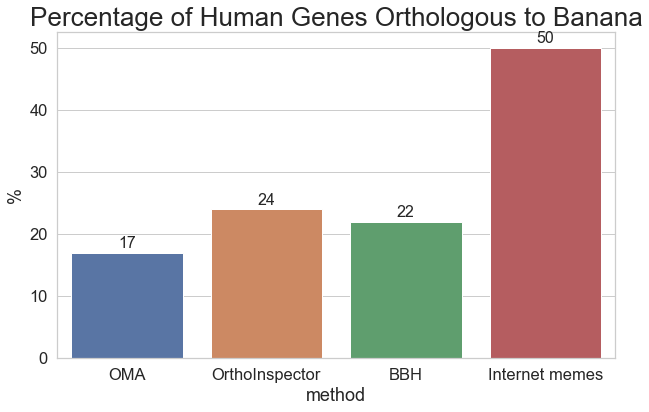

In [21]:
plt.figure(figsize=(10,6))
myplot = sns.barplot(x="method", y="human", data=summary_df)
for p in myplot.patches:
    myplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   size = 16,
                   textcoords = 'offset points')
plt.title("Percentage of Human Genes Orthologous to Banana", size=26)
plt.ylabel("%")
plt.savefig('./Percentage_human_banana_orthologs_barplot.pdf')